<a href="https://colab.research.google.com/github/AlwaysEden/Machine-Learning-HW/blob/main/HW6_PCA_and_LDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

# Code
1.   Implement and apply PCA and LDA to MNIST to find 2 dimensional spaces.
2.   Visualize them by plotting the samples for both algorithms.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request
import gzip
import pickle

In [ ]:
def load_data(dataset):

    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)

    all_data_x = np.concatenate([train_set[0], valid_set[0], test_set[0]])
    all_data_y = np.concatenate([train_set[1], valid_set[1], test_set[1]])

    print('... data has been loaded!')
    return all_data_x, all_data_y

In [ ]:
def PCA(data, n_components):

  #Data Centering
  mean = np.mean(data, axis=0)
  centered_data = data - mean

  #Covariance Matrix Computation
  cov_matrix = np.cov(centered_data, rowvar=False)

  #EigenValue and EigenVector Computation
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

  #Principle Component Sorting
  sorted_indices = np.argsort(eigenvalues)[::-1]
  sorted_vector = eigenvectors[:,sorted_indices]
  principal_components = sorted_vector[:,:n_components]

  #Projection
  projected_data = np.dot(centered_data, principal_components)

  return projected_data

def LDA(data, label, n_components):
  #Classification
  n_class = list(set(label))
  data_class = [None]*len(n_class)

  for i in range(len(n_class)):
    indices = np.where(label == n_class[i])[0]
    data_class[i] = data[indices]

  #Mean Vector Calculation
  mean = [None]*len(n_class)
  for i in range(len(n_class)):
    mean[i] = np.mean(data_class[i], axis=0)

  #Within Class Calculation
  Sw = np.zeros((data.shape[1], data.shape[1]))
  for i in range(len(n_class)):
    class_scatter = np.cov(data_class[i], rowvar=False)
    Sw += class_scatter

  #Between Class Calculation
  overall_mean = np.mean(data, axis=0)
  Sb = np.zeros((data.shape[1], data.shape[1]))
  for i in range(len(n_class)):
    n_i = data_class[i].shape[0]
    diff = (mean[i] - overall_mean).reshape(X.shape[1], 1)
    Sb += n_i * np.dot(diff, diff.T)

  #Find optimal solution
  Sw_inv = np.linalg.pinv(Sw)
  eigenvalues, eigenvectors = np.linalg.eig(np.dot(Sw_inv,Sb))

  sorted_indices = np.argsort(eigenvalues)[::-1]
  sorted_vector = eigenvectors[:,sorted_indices]
  principal_components = sorted_vector[:,:n_components]

  #Projection
  projected_data = np.dot(data, principal_components)
  return projected_data

In [ ]:
data_x, data_y= load_data('mnist.pkl.gz')
images = data_x.copy()
labels = data_y.copy()

Loading data...
... data has been loaded!


In [ ]:
pca_data = PCA(images,2)
lda_data = LDA(images, labels, 2)

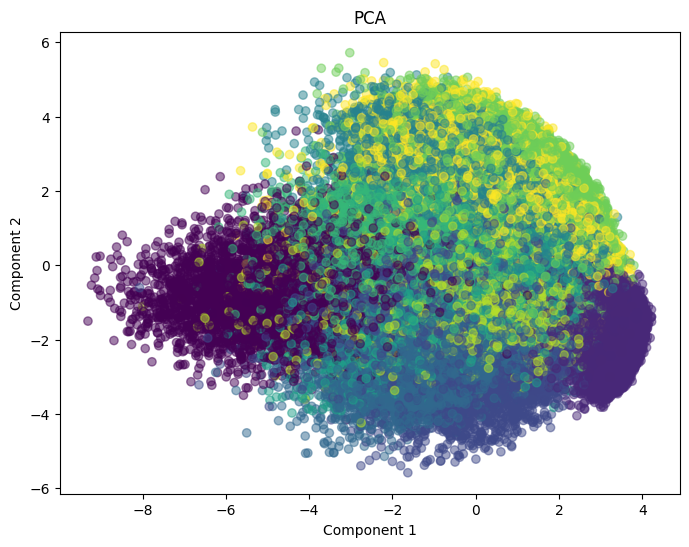

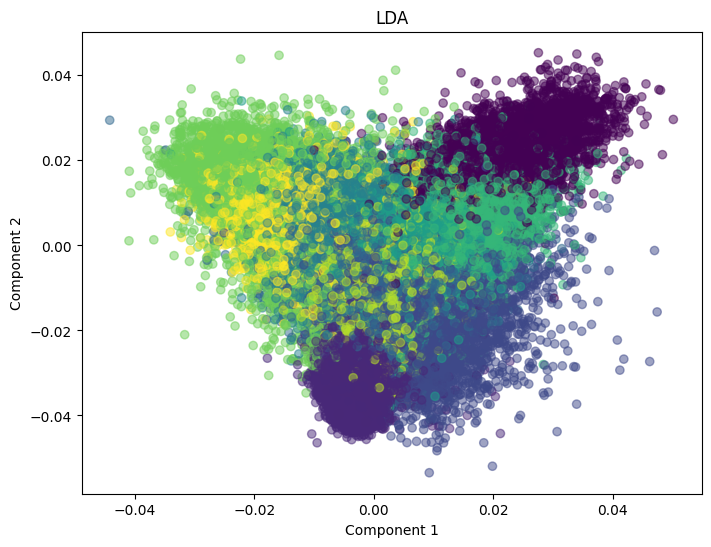

In [ ]:
def plot_results(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

plot_results(pca_data, labels, 'PCA')
plot_results(lda_data, labels, 'LDA')

# ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Can you implement from scratch (without any specialized libraries) and apply PCA and LDA to the MNIST dataset to find 2 dimensional spaces?
2.   (If not provided automatically in the previous prompt:) Can you plot both PCA and LDA results?


**Paste the answer provided and run the code below:**

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy()  # Features (28x28 images flattened to 784)
y = mnist.target.to_numpy().astype(int)  # Labels (0-9)

In [ ]:
def pca(X, n_components):
    # Step 1: Center the data
    X_centered = X - np.mean(X, axis=0)

    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Step 3: Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top 'n_components' eigenvectors
    W = sorted_eigenvectors[:, :n_components]

    # Step 6: Project the data onto the new feature space
    X_pca = X_centered.dot(W)

    return X_pca

# Apply PCA to reduce to 2D
X_pca = pca(X, n_components=2)

In [ ]:
def lda(X, y, n_components):
    # Step 1: Compute the mean vectors for each class
    class_labels = np.unique(y)
    mean_vectors = [np.mean(X[y == label], axis=0) for label in class_labels]

    # Step 2: Compute the within-class scatter matrix
    S_W = np.zeros((X.shape[1], X.shape[1]))
    for label, mean_vector in zip(class_labels, mean_vectors):
        class_scatter = np.cov(X[y == label, :], rowvar=False)
        S_W += class_scatter

    # Step 3: Compute the between-class scatter matrix
    overall_mean = np.mean(X, axis=0)
    S_B = np.zeros((X.shape[1], X.shape[1]))
    for label, mean_vector in zip(class_labels, mean_vectors):
        n = X[y == label].shape[0]
        mean_diff = (mean_vector - overall_mean).reshape(X.shape[1], 1)
        S_B += n * (mean_diff).dot(mean_diff.T)

    # Step 4: Solve the generalized eigenvalue problem
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))

    # Step 5: Sort the eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 6: Select the top 'n_components' eigenvectors
    W = sorted_eigenvectors[:, :n_components]

    # Step 7: Project the data onto the new feature space
    X_lda = X.dot(W)

    return X_lda

# Apply LDA to reduce to 2D
X_lda = lda(X, y, n_components=2)

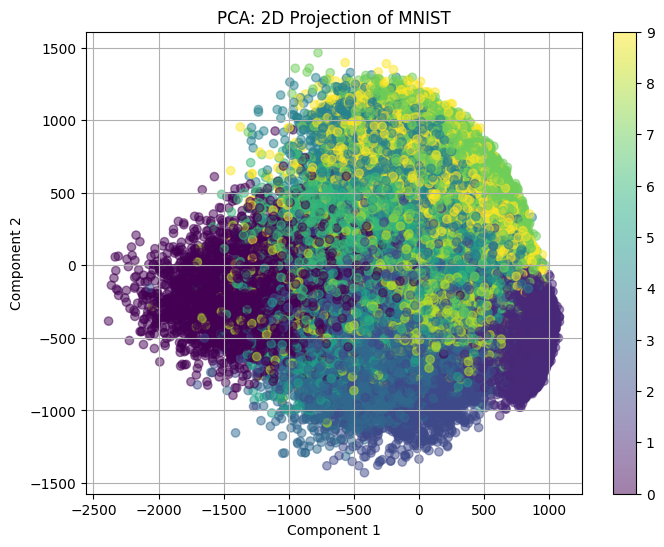

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


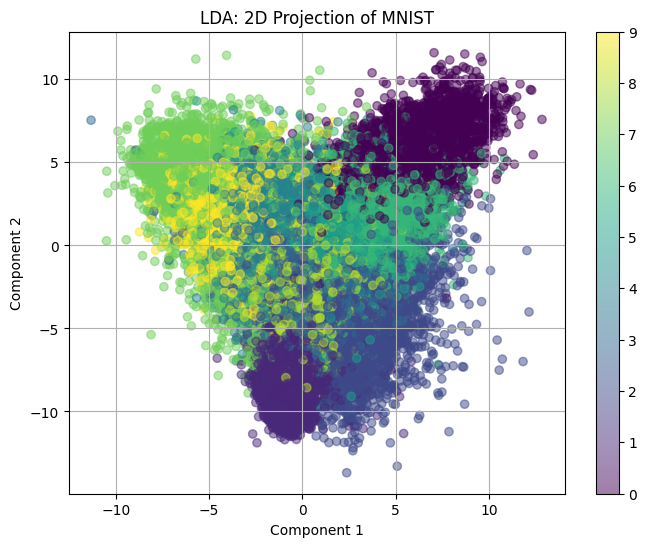

In [ ]:
import matplotlib.pyplot as plt

def plot_results(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid()
    plt.show()

# Plot PCA results
plot_results(X_pca, y, 'PCA: 2D Projection of MNIST')

# Plot LDA results
plot_results(X_lda, labels, 'LDA: 2D Projection of MNIST')


##Report


1.   What are some differences you notice between your code and ChatGPT's? (Name at least 3)
2.   Ask ChatGPT to compare the differences between PCA and LDA. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?
4.   Conclude with some thoughts and things you learned from this homework.

#Answer
1.
- Classification. I did classification before calculation. Howerver, ChatGPT select the classes during calculation.
- np.dot: I ussally use np.dot function. But ChatGPT use dot function in this way "X.dot(Y)"
- loop using zip(): ChatGPT use zip() to bind mean vector and labels. However, I created the mean vector following labels index.
2. I totally agree with ChatGPT. In my opinion, the big differences are purpose and approach. In a purpose, PCA is for dimension reduction and LDA is for classification. In an approach, PCA use eigen Decomposition of Covariance Matrix. LDA use not only eigen Decomposition of Covariance Matrix, but also scatter maxtrix.
3. I realized that MNIST is Singular Matrix. Because of that, I couldn't use np.linalg.inv(). So I used np.linalg.pinv() for dealing with Singular Matrix. Thanks to this error, I got to know the existence of singular matrix in the real data.



## ChatGPT's Answer about Q2
PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) are both techniques used for dimensionality reduction, but they have different goals and methodologies. Here are the key differences between PCA and LDA:

### 1. Purpose

- **PCA**:
  - **Goal**: PCA aims to reduce dimensionality while preserving as much variance as possible in the data.
  - **Focus**: It focuses on identifying the directions (principal components) that maximize the variance of the data, regardless of the class labels.

- **LDA**:
  - **Goal**: LDA aims to find a lower-dimensional representation that maximizes class separability.
  - **Focus**: It focuses on maximizing the distance between the means of different classes while minimizing the variance within each class.

### 2. Data Usage

- **PCA**:
  - **Unsupervised Learning**: PCA is an unsupervised technique and does not take class labels into account. It looks at the overall structure of the data.

- **LDA**:
  - **Supervised Learning**: LDA is a supervised technique and requires class labels to operate. It uses the class information to find a transformation that best separates the classes.

### 3. Approach

- **PCA**:
  - **Eigen Decomposition of Covariance Matrix**: PCA computes the eigenvectors and eigenvalues of the covariance matrix of the data to determine the principal components.
  - **Maximizes Variance**: It selects components that explain the most variance, even if they do not contribute to class separation.

- **LDA**:
  - **Eigen Decomposition of Scatter Matrices**: LDA computes the eigenvectors and eigenvalues based on the within-class scatter matrix and the between-class scatter matrix.
  - **Maximizes Class Separability**: It selects components that maximize the ratio of between-class variance to within-class variance.

### 4. Output Dimensions

- **PCA**:
  - **Number of Components**: The number of principal components can be less than or equal to the number of original features, regardless of the number of classes.
  - **Dimensions**: PCA can reduce dimensions even when the number of classes is greater than one.

- **LDA**:
  - **Number of Components**: The maximum number of linear discriminants (components) is limited to \(C-1\), where \(C\) is the number of classes. If there are three classes, LDA can only reduce to a maximum of two dimensions.
  - **Dimensions**: LDA requires at least two classes to compute meaningful results.

### 5. Interpretation

- **PCA**:
  - **Data Representation**: The principal components do not have a direct relation to the classes; they represent the overall data structure.
  - **Variance Focused**: The components are oriented toward maximizing variance without regard to class separability.

- **LDA**:
  - **Class Representation**: The linear discriminants are directly related to class separability and can be interpreted as separating hyperplanes.
  - **Class Focused**: The components are oriented toward maximizing class distance and minimizing within-class variance.

### Summary Table

| Aspect                   | PCA                        | LDA                        |
|--------------------------|---------------------------|---------------------------|
| Purpose                  | Maximize variance          | Maximize class separability|
| Data Usage               | Unsupervised              | Supervised                |
| Approach                 | Eigen decomposition of covariance matrix | Eigen decomposition of scatter matrices |
| Output Dimensions        | Up to original features   | \(C-1\) (where \(C\) = classes) |
| Interpretation           | General data structure     | Class separability        |

### Conclusion

In summary, while both PCA and LDA are used for dimensionality reduction, they serve different purposes and are based on different principles. PCA is more focused on preserving variance without regard to class labels, while LDA is specifically designed to enhance class separability using label information. Choosing between PCA and LDA depends on the specific goals of your analysis and the nature of your data.